# 

# Assessment 1 - Machine Learning
# (Exercise 1 - Regression Task)

**Kaggle Notebook by Val Kyrvey L. Latoja**

**Brief**

The student is tasked to do two (2) exercises that will put their fundamental knowledge of machine learning to the test. The data must have a minimum of 5 features (Columns) with no limitation.

**Goal**

The goal is to complete all tasks and exercises as per the instructions from the [GitHub](https://github.com/usmanahmad11/Experiment-Portfolio/wiki/Machine-Learning-Assignment-1-%E2%80%90-40%25-Instructions) page implemented by the advisor. The student should know the crucial knowledge of machine learning methods and algorithms.

Exercise 1 - Regression Task

## 1.1 Library/CSV Implementation

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore') # ignore warnings from plots

# Data Selection
data = pd.read_csv("/kaggle/input/video-games-sales/video_games_sales.csv")

## 1.2 Data Gathering & Cleaning

In [2]:
data.head(10) # First 10 data rows

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [3]:
data.tail(10) # Last 10 data rows

,rank,name,platform,year,genre,publisher,na_sales,eu_sales,jp_sales,other_sales,global_sales
16588,16591,Mega Brain Boost,DS,2008.0,Puzzle,Majesco Entertainment,0.01,0.00,0.00,0.0,0.01
16589,16592,Chou Ezaru wa Akai Hana: Koi wa Tsuki ni Shiru...,PSV,2016.0,Action,dramatic create,0.00,0.00,0.01,0.0,0.01
16590,16593,Eiyuu Densetsu: Sora no Kiseki Material Collec...,PSP,2007.0,Role-Playing,Falcom Corporation,0.00,0.00,0.01,0.0,0.01
16591,16594,Myst IV: Revelation,PC,2004.0,Adventure,Ubisoft,0.01,0.00,0.00,0.0,0.01
16592,16595,Plushees,DS,2008.0,Simulation,Destineer,0.01,0.00,0.00,0.0,0.01
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.0,0.01


In [4]:
data.info() # Gathering info by which types our dataset provides

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   rank          16598 non-null  int64  
 1   name          16598 non-null  object 
 2   platform      16598 non-null  object 
 3   year          16327 non-null  float64
 4   genre         16598 non-null  object 
 5   publisher     16540 non-null  object 
 6   na_sales      16598 non-null  float64
 7   eu_sales      16598 non-null  float64
 8   jp_sales      16598 non-null  float64
 9   other_sales   16598 non-null  float64
 10  global_sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [5]:
data.describe() # Shows statistical data such as the avergage (mean), standard deviation (std), minimum & maximum

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


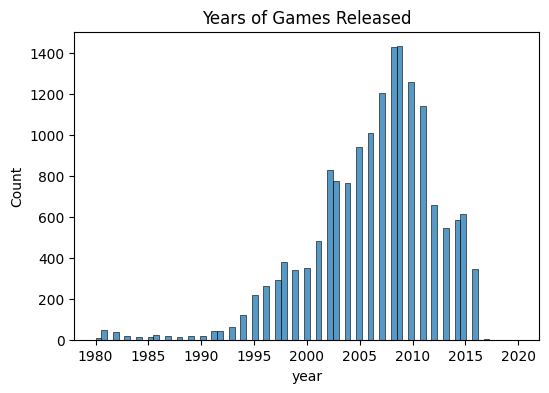

In [6]:
# Testing with raw data visualization

plt.figure(figsize=(6,4))
sns.histplot(data['year'])
plt.title('Years of Games Released')
plt.show()

In [7]:
data.isnull().sum() # Detects nullified data

rank              0
name              0
platform          0
year            271
genre             0
publisher        58
na_sales          0
eu_sales          0
jp_sales          0
other_sales       0
global_sales      0
dtype: int64

In [8]:
data = data.dropna() # Removes unnecessary data
data = data.drop(['name', 'platform', 'genre', 'publisher'], axis = 1) # Drops any unneccessary features that won't be used inside the model.
data.isnull().sum()

rank            0
year            0
na_sales        0
eu_sales        0
jp_sales        0
other_sales     0
global_sales    0
dtype: int64

In [9]:
data.head()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,2006.0,41.49,29.02,3.77,8.46,82.74
1,2,1985.0,29.08,3.58,6.81,0.77,40.24
2,3,2008.0,15.85,12.88,3.79,3.31,35.82
3,4,2009.0,15.75,11.01,3.28,2.96,33.00
4,5,1996.0,11.27,8.89,10.22,1.00,31.37


In [10]:
scaler = MinMaxScaler() # Witch MinMaxScaler(), we can scale our data into more mediated numerics
data[data.columns[2:]] = scaler.fit_transform(data[data.columns[2:]])

data.head()

,rank,year,na_sales,eu_sales,jp_sales,other_sales,global_sales
0,1,2006.0,1.000000,1.000000,0.368885,0.800378,1.000000
1,2,1985.0,0.700892,0.123363,0.666341,0.072848,0.486281
2,3,2008.0,0.382020,0.443832,0.370841,0.313150,0.432854
3,4,2009.0,0.379610,0.379394,0.320939,0.280038,0.398767
4,5,1996.0,0.271632,0.306340,1.000000,0.094607,0.379064


## 1.3 Algorithm Implementation

In [11]:
# Feature Selection.
x = data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']]      # Feature
y = data['rank']                                                 # Target

# Splitting the data.
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size=0.2)

In [12]:
x_train

,na_sales,eu_sales,jp_sales,other_sales
10904,0.000241,0.000000,0.007828,0.000000
8615,0.003856,0.000000,0.000000,0.000000
9287,0.002410,0.001378,0.000000,0.000000
10477,0.002410,0.000000,0.000000,0.000946
1432,0.016148,0.017919,0.000000,0.016083
...,...,...,...,...
15090,0.000000,0.000689,0.000000,0.000000
14812,0.000482,0.000000,0.000000,0.000000
5842,0.001205,0.001034,0.020548,0.001892
6907,0.004579,0.001034,0.000000,0.001892


In [13]:
x_test

,na_sales,eu_sales,jp_sales,other_sales
4184,0.003374,0.008615,0.000000,0.007569
6583,0.005785,0.000345,0.000000,0.000000
8888,0.002651,0.001378,0.000000,0.000000
11249,0.000000,0.000000,0.008806,0.000000
15002,0.000000,0.000000,0.001957,0.000000
...,...,...,...,...
8017,0.003374,0.000000,0.000978,0.002838
296,0.067004,0.019986,0.062622,0.003784
275,0.020246,0.096141,0.001957,0.050142
12903,0.000000,0.000000,0.004892,0.000000


In [14]:
# fixing the x_train index

fixed_x_train = x_train.reset_index()
fixed_x_train = fixed_x_train.drop(['index'], axis = 1)
fixed_x_train

,na_sales,eu_sales,jp_sales,other_sales
0,0.000241,0.000000,0.007828,0.000000
1,0.003856,0.000000,0.000000,0.000000
2,0.002410,0.001378,0.000000,0.000000
3,0.002410,0.000000,0.000000,0.000946
4,0.016148,0.017919,0.000000,0.016083
...,...,...,...,...
13027,0.000000,0.000689,0.000000,0.000000
13028,0.000482,0.000000,0.000000,0.000000
13029,0.001205,0.001034,0.020548,0.001892
13030,0.004579,0.001034,0.000000,0.001892


In [15]:
# fixing the x_test index.

fixed_x_test = x_test.reset_index()
fixed_x_test = fixed_x_test.drop(['index'], axis = 1)

# feature training data.
fixed_x_test

,na_sales,eu_sales,jp_sales,other_sales
0,0.003374,0.008615,0.000000,0.007569
1,0.005785,0.000345,0.000000,0.000000
2,0.002651,0.001378,0.000000,0.000000
3,0.000000,0.000000,0.008806,0.000000
4,0.000000,0.000000,0.001957,0.000000
...,...,...,...,...
3254,0.003374,0.000000,0.000978,0.002838
3255,0.067004,0.019986,0.062622,0.003784
3256,0.020246,0.096141,0.001957,0.050142
3257,0.000000,0.000000,0.004892,0.000000
